In [1]:
#Changing the working directory to the root
%cd ../..

C:\Users\zain.hanif\Desktop\HIS Project\Modern-Time-Series-Forecasting-with-Python


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from tqdm import tqdm
import plotly.graph_objects as go
import os
import plotly.io as pio
pio.templates.default = "plotly_white"
pio.kaleido.scope.mathjax = None
import pandas as pd
from pathlib import Path

import tqdm   #Importing tqdm above in order to solve the problem
#Import tqdm above in order to use autonotebook
from tqdm.autonotebook import tqdm
from itertools import cycle
%load_ext autoreload
%autoreload 2
np.random.seed()
tqdm.pandas()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
os.makedirs("imgs/chapter_2", exist_ok=True)

### Pandas Datetime Operations, Indexing, and Slicing – A refresher

Before we start wrangling our data, let's quickly look at a few pandas concepts which will be useful. And for that let's pick an easy, well formatted stock exchange price dataset from UCI ML Repo.

In [43]:
import warnings
#Ignoring All the warning
warnings.filterwarnings("ignore")

df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx", skiprows=1)

df.head()

,date,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


#### Converting date columns to pd.Timestamp/DatetimeIndex
First, we need to convert the date columns in `str` to `pd.Timestamp` and we can use [`pd.to_datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) to accomplish that.

In [44]:
pd.to_datetime("13-4-1987").strftime("%d, %B %Y")

'13, April 1987'

Now let's look at a case where the automatic parsing fails. The date is 4th January, 1987.

In [47]:
pd.to_datetime("4-1-1987").strftime("%d, %B %Y")

'01, April 1987'

Now, anyone can make that mistake because we are not telling the computer whether month comes first or day comes first and pandas assumes month coming first. Let's rectify that.

In [49]:
pd.to_datetime("4-1-1987", dayfirst=True).strftime("%d, %B %Y")

'04, January 1987'

Another case where the automatic date parsing fails is when the date string is in a non-standard form. There we can give a strftime formatted string to help pandas parse the dates correctly

In [51]:
pd.to_datetime("4|1|1987", format="%d|%m|%Y").strftime("%d, %B %Y")

'04, January 1987'

**Best Practice** - Wherever possible, use the `format` or at least `dayfirst` and `yearfirst` parameters to make sure pandas is understanding the dates correctly. `format` is a standard strftime formatted string, for e.g., "%Y-%m-%d". For full table of codes and their meanings refer [here](https://strftime.org/).

In [53]:
df['date'] = pd.to_datetime(df['date'], yearfirst=True)
df['date'].dtype


dtype('<M8[ns]')

In [55]:
df.date.min(),df.date.max()

(Timestamp('2009-01-05 00:00:00'), Timestamp('2011-02-22 00:00:00'))

#### dt accessor and datetime properties

In [57]:
#Error - Using isocalender in order to check the weeks

print(f"""
Date: {df.date.iloc[0]}
Day of year: {df.date.dt.day_of_year.iloc[0]}
Day of week: {df.date.dt.dayofweek.iloc[0]} 
Week of Year: {df.date.dt.isocalendar().week.iloc[0]}  
Month: {df.date.dt.month.iloc[0]}
Month Name: {df.date.dt.month_name().iloc[0]}
Quarter: {df.date.dt.quarter.iloc[0]}
Year: {df.date.dt.year.iloc[0]}
ISO Week: {df.date.dt.isocalendar().week.iloc[0]}
""")


Date: 2009-01-05 00:00:00
Day of year: 5
Day of week: 0 
Week of Year: 2  
Month: 1
Month Name: January
Quarter: 1
Year: 2009
ISO Week: 2



#### Slicing and Indexing

If you set the date column as the index of the dataframe, all kinds of helpful slicing and indexing is possible.

In [59]:
df.set_index("date", inplace=True)

# Select all data after 2010-01-04(including)
df["2010-01-04":]
# Select all data between 2010-01-04 and 2010-02-06(not including)
df["2010-01-04": "2010-02-06"]
# Select data 2010 and before
df[: "2010"]
# Select data between 2010-01 and 2010-06(both including)
df["2010-01": "2010-06"]

,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,,
2010-01-04,0.010229,0.014478,0.015916,0.000000,0.016018,0.000000,0.000000,0.016778,0.008399
2010-01-05,0.013898,0.024019,0.003111,-0.002722,0.004028,0.002535,0.002780,0.001316,0.008067
2010-01-06,0.007957,0.005706,0.000545,0.000409,0.001357,0.004635,0.006938,0.000586,0.005330
2010-01-07,0.007772,0.007498,0.003993,-0.002484,-0.000597,-0.004650,-0.003938,-0.000360,-0.006375
2010-01-08,-0.003189,0.000835,0.002878,0.003027,0.001356,0.010862,-0.002672,0.003554,0.001229
...,...,...,...,...,...,...,...,...,...
2010-06-24,0.000166,-0.008024,-0.016946,-0.014455,-0.015236,0.000467,-0.018948,-0.017801,-0.006717
2010-06-25,-0.000920,-0.003591,0.002855,-0.007366,-0.010585,-0.019411,0.013778,-0.007954,-0.002311
2010-06-28,0.010132,0.016951,-0.002036,0.014168,0.004981,-0.004481,-0.009283,0.009125,0.000540


#### Sequences and Offsets of Dates

In addition to the semantic information and intelligent indexing and slicing, pandas also has tools to create date sequences and even manipulate date sequences.

In [61]:
# Specifying start and end dates with frequency
pd.date_range(start="2018-01-20", end="2018-01-23", freq="D").astype(str).tolist()

['2018-01-20', '2018-01-21', '2018-01-22', '2018-01-23']

In [63]:
# Specifying start and number of periods to generate in the given frequency
pd.date_range(start="2018-01-20", periods=4, freq="D").astype(str).tolist()

['2018-01-20', '2018-01-21', '2018-01-22', '2018-01-23']

In [49]:
# Generating a date sequence with every 2 days
pd.date_range(start="2018-01-20", periods=4, freq="2D").astype(str).tolist()

['2018-01-20', '2018-01-22', '2018-01-24', '2018-01-26']

In [51]:
# Generating a date sequence every month. By default it starts with Month end
pd.date_range(start="2018-01-20", periods=4, freq="M").astype(str).tolist()

['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30']

In [65]:
# Generating a date sequence every month, but month start
pd.date_range(start="2018-01-20", periods=4, freq="MS").astype(str).tolist()

['2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01']

We can also add or subtract days/months/etc. to dates using TimeDelta

In [67]:
# Add four days to the date range
(pd.date_range(start="2018-01-20", end="2018-01-23", freq="D") + pd.Timedelta(4, unit="D")).astype(str).tolist()

['2018-01-24', '2018-01-25', '2018-01-26', '2018-01-27']

In [57]:
# Add four weeks to the date range
(pd.date_range(start="2018-01-20", end="2018-01-23", freq="D") + pd.Timedelta(4, unit="W")).astype(str).tolist()

['2018-02-17', '2018-02-18', '2018-02-19', '2018-02-20']

#### Resampling, Shifting, Rolling Window, and Expanding Window Operations

**Resampling**   
Resampling is a powerful operation which let's you aggregate and disaggregate along the temporal dimension.

In [69]:
# Resampling at Month Start and taking the mean
m_df = df[['ISE']].resample("MS").mean()
display(m_df.head())
# Resampling at Week(starting Monday) and taking the mean
w_df = df[['ISE']].resample("W-MON").mean()
display(w_df.head())

,ISE
date,
2009-01-01,-0.002024
2009-02-01,-0.003820
2009-03-01,0.003175
2009-04-01,0.009799
2009-05-01,0.005297


,ISE
date,
2009-01-05,0.035754
2009-01-12,-0.016995
2009-01-19,-0.005143
2009-01-26,0.007167
2009-02-02,-0.005458


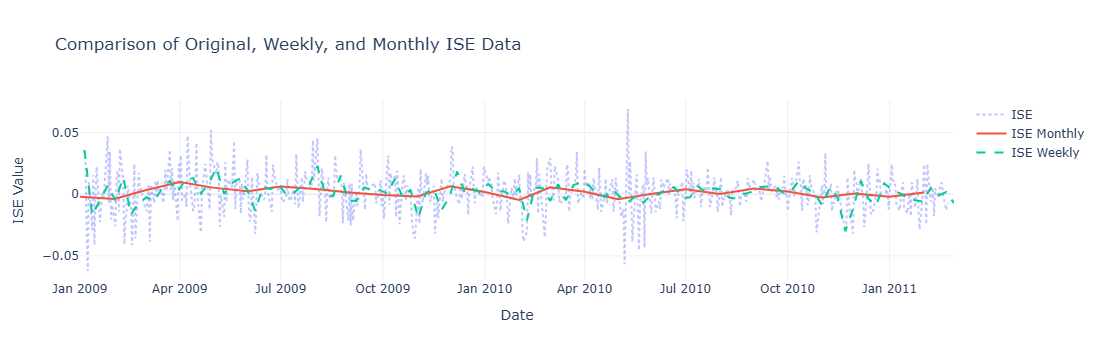

In [103]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.index,
    y=df.ISE,
    opacity=0.4,
    name="ISE",
    line={"dash": "dot"}
))

fig.add_trace(go.Scatter(
    x=m_df.index,
    y=m_df['ISE'],
    opacity=1.0,
    name="ISE Monthly",
#     line={"dash": "dashdot"}
))
fig.add_trace(go.Scatter(
    x=w_df.index,
    y=w_df['ISE'],
    opacity=1,
    name="ISE Weekly",
    line={"dash": "dash"}
))
#Adding description to the data
fig.update_layout(
    title="Comparison of Original, Weekly, and Monthly ISE Data",
    xaxis_title="Date",
    yaxis_title="ISE Value"
)
fig.show()
fig.write_image("imgs/chapter_2/resampling.png", width=1600, height=600)

**Shift**   
Shifting a series along the temporal dimension is another valuable operation

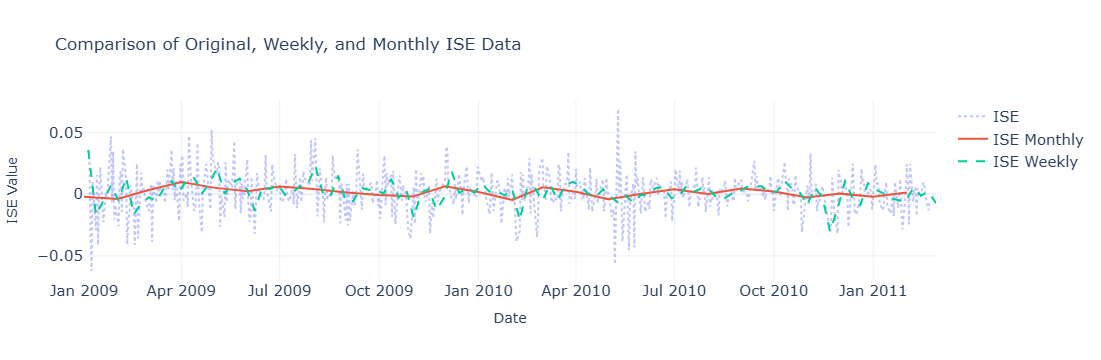

In [105]:
#font size of the tick labels
fig.update_layout(
    yaxis=dict(tickfont=dict(size=15)),
    xaxis=dict(tickfont=dict(size=15)),
    legend=dict(font=dict(size=15)),
)
fig.show()

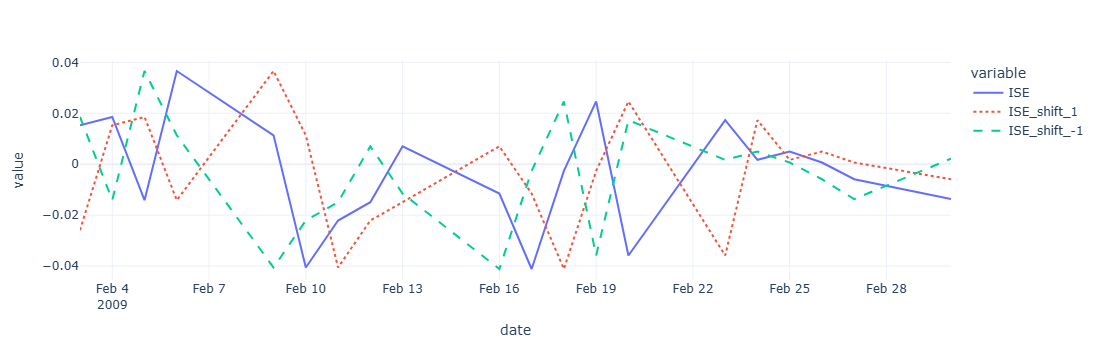

In [115]:
#Creating new dataframe 
plot_df = df.loc[:, ['ISE']]
# Shift forward by one day
plot_df['ISE_shift_1'] = df[["ISE"]].shift(1)
# Shift backward by one day
plot_df['ISE_shift_-1'] = df[["ISE"]].shift(-1)

plot_df = plot_df.dropna().iloc[20:40].reset_index()
plot_df = pd.melt(plot_df, id_vars="date")
fig = px.line(plot_df, x="date", y="value", color="variable", line_dash="variable", template="plotly_white")
fig.write_image("imgs/chapter_2/shift.png", width=1600, height=600)
# fig.update_layout(
#     yaxis=dict(tickfont=dict(size=15)),
#     xaxis=dict(tickfont=dict(size=15)),
#     legend=dict(font=dict(size=15)),
# )
fig.show()

**Rolling and Expanding Window**   

There are strong use cases to calculate some statistics on a rolling or expanding window.

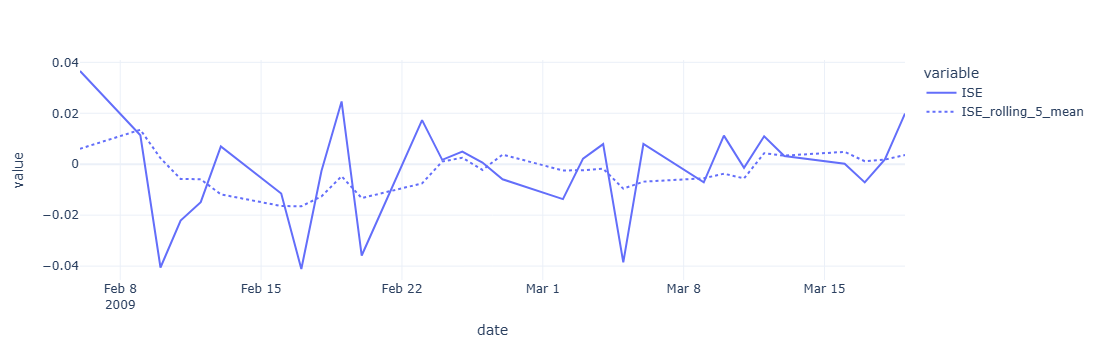

In [69]:
plot_df = df.loc[:, ['ISE']]
# Moving Average of 5 days
plot_df["ISE_rolling_5_mean"] = df[['ISE']].rolling(window=5).mean()

plot_df = plot_df.dropna().iloc[20:50].reset_index()
plot_df = pd.melt(plot_df, id_vars="date")
fig = px.line(plot_df, x="date", y="value", line_dash="variable", template="plotly_white")
# fig.update_layout(
#     yaxis=dict(tickfont=dict(size=15)),
#     xaxis=dict(tickfont=dict(size=15)),
#     legend=dict(font=dict(size=15)),
# )
fig.write_image("imgs/chapter_2/rolling_1.png", width=1600, height=600)
fig.show()

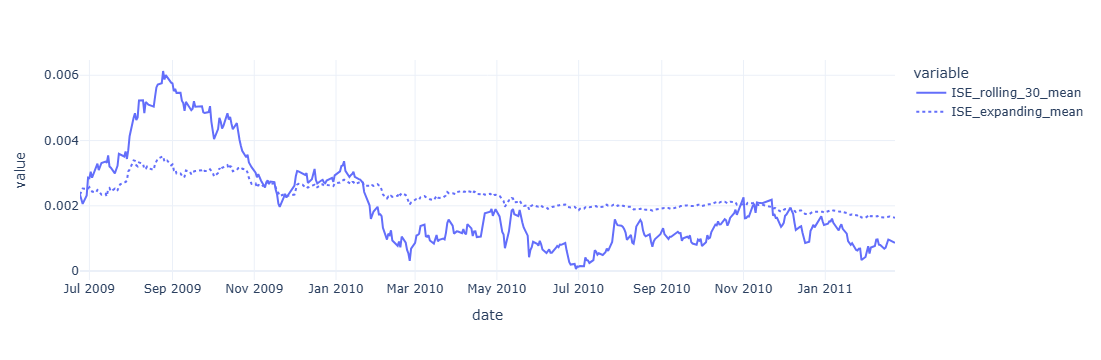

In [71]:
plot_df = df.loc[:, ['ISE']]
# Moving Average of 30 days
plot_df["ISE_rolling_30_mean"] = df[['ISE']].rolling(window=120).mean()
# Expanding Average
plot_df["ISE_expanding_mean"] = df[['ISE']].expanding().mean()
plot_df.drop(columns='ISE', inplace=True)
plot_df = plot_df.dropna().reset_index()
plot_df = pd.melt(plot_df, id_vars="date")
fig = px.line(plot_df, x="date", y="value", line_dash="variable", template="plotly_white")
# fig.update_layout(
#     yaxis=dict(tickfont=dict(size=15)),
#     xaxis=dict(tickfont=dict(size=15)),
#     legend=dict(font=dict(size=15)),
# )
fig.write_image("imgs/chapter_2/rolling_2.png", width=1600, height=600)
fig.show()

In [73]:
del plot_df, df, w_df

### Missing Value Treatment

In [117]:
def format_plot(fig, legends, font_size=15, title_font_size=20):
    names = cycle(legends)
    fig.for_each_trace(lambda t: t.update(name=next(names)))
    fig.update_layout(
        autosize=False,
        width=900,
        height=500,
        title={"x": 0.5, "xanchor": "center", "yanchor": "top"},
        titlefont={"size": title_font_size},
        legend_title=None,
        legend=dict(
            font=dict(size=font_size),
            orientation="h",
            yanchor="bottom",
            y=0.98,
            xanchor="right",
            x=1,
        ),
        yaxis=dict(
            title_text="Value",
            titlefont=dict(size=font_size),
            tickfont=dict(size=font_size),
        ),
        xaxis=dict(
            title_text="Day",
            titlefont=dict(size=font_size),
            tickfont=dict(size=font_size),
        ),
    )
    return fig

In [119]:
df = pd.read_csv("https://www.data.act.gov.au/resource/94a5-zqnn.csv", sep=",")
#Selecting one location and pm2.5
df = df.loc[df.name=="Monash", ['datetime', 'pm2_5_1_hr']]
df.datetime = pd.to_datetime(df.datetime)
df.sort_values("datetime", inplace=True)
df.set_index("datetime", inplace=True)
# introducing a missing value by nulling out the values
# Update the time and date according to avaible dates in dataset
df.loc["2024-10-26 01:00:00":"2024-10-28 08:00:00", "pm2_5_1_hr"] = np.nan

#We need to check the minimum and maximum date from database and update these dates 
print(df.index.min(), df.index.max())
df.head()

2024-10-25 09:00:00 2024-11-06 21:00:00


,pm2_5_1_hr
datetime,
2024-10-25 09:00:00,4.75
2024-10-25 10:00:00,5.00
2024-10-25 11:00:00,4.50
2024-10-25 12:00:00,2.48
2024-10-25 13:00:00,1.63


**We have introduced a few missing values between "2022-07-07 00:00" and "2021-07-07 12:00" in the PM2.5 column**

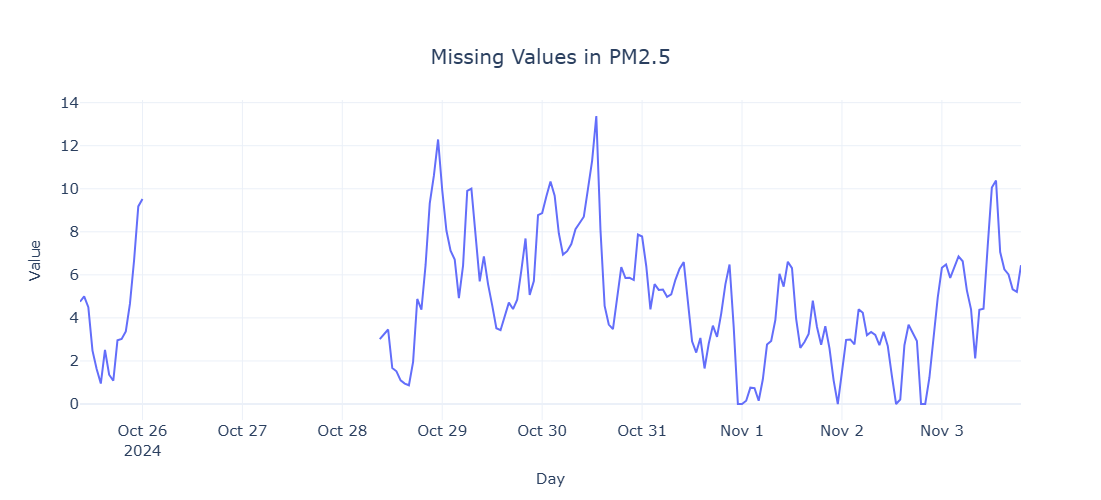

In [121]:
#Update the time and date according to avaible dates in dataset
df = df.loc["2024-10-22 07:00:00":"2024-11-03 19:00:00", "pm2_5_1_hr"].to_frame()
fig = px.line(df, x=df.index, y="pm2_5_1_hr", title="Missing Values in PM2.5")
fig = format_plot(fig, ["Original"])
fig.write_image("imgs/chapter_2/missing_values.png")
fig.show()

## Last Observation Carried Forward (Forward Fill), Next Observation Carried Backward (Backward Fill) and Mean Value Fill

In [123]:
_df = df.copy()
#Forward Fill
_df["ffill"] = _df['pm2_5_1_hr'].ffill()
# Backward Fill
_df["bfill"] = _df['pm2_5_1_hr'].bfill()
# Mean Value Fil
_df["mean_value"] = _df['pm2_5_1_hr'].fillna(df['pm2_5_1_hr'].mean())

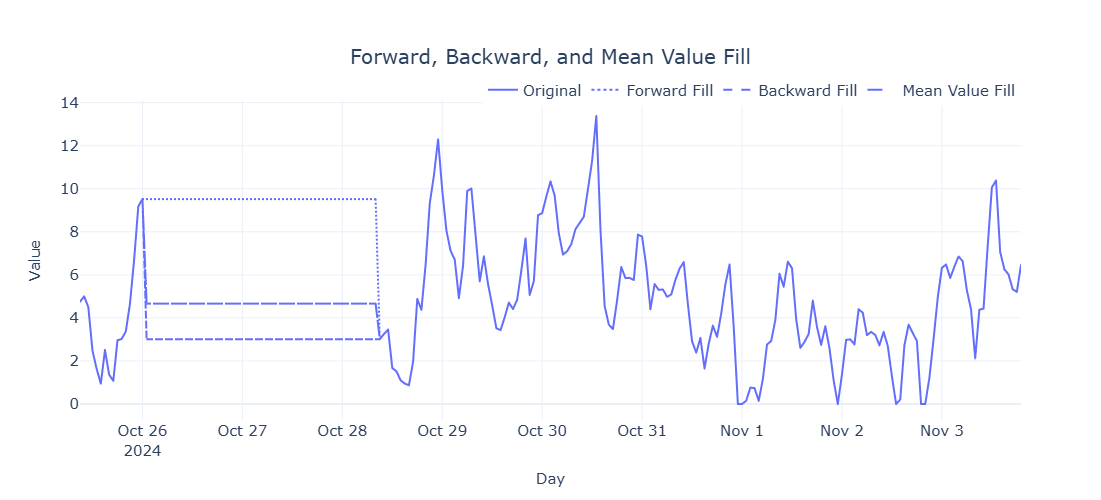

In [125]:
#Plotting
plot_df = pd.melt(_df.reset_index(), id_vars="datetime", var_name="series")
fig = px.line(plot_df, x="datetime", y=["value"], line_dash="series", title="Forward, Backward, and Mean Value Fill")
fig = format_plot(fig, ['Original', 'Forward Fill', 'Backward Fill', "Mean Value Fill"])
fig.write_image("imgs/chapter_2/ffill_bfill_mean_missing_values.png")
fig.show()

## Interpolation

In [127]:
_df = df.copy()
_df["linear_interpolation"] = _df['pm2_5_1_hr'].interpolate(method="linear")
_df["nearest_interpolation"] = _df['pm2_5_1_hr'].interpolate(method="nearest")

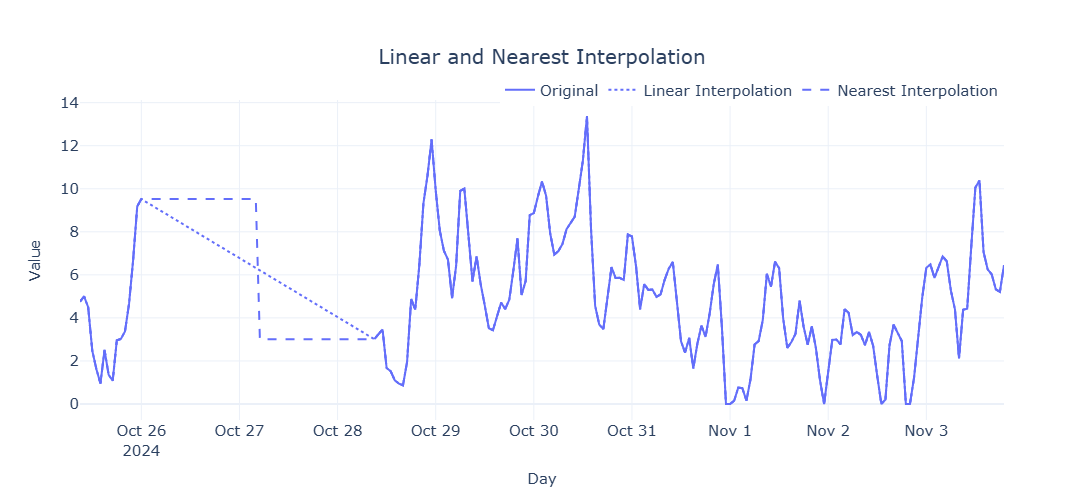

In [128]:
#Plotting
plot_df = pd.melt(_df.reset_index(), id_vars="datetime", var_name="series")
fig = px.line(plot_df, x="datetime", y=["value"], line_dash="series", title="Linear and Nearest Interpolation")
fig = format_plot(fig, ['Original', "Linear Interpolation", "Nearest Interpolation"])
fig.write_image("imgs/chapter_2/linear_nearest_missing_values.png")
fig.show()

In [131]:
_df = df.copy()
#Checking for duplicates and removing them
duplicates = _df.index.duplicated()
_df = _df[~_df.index.duplicated(keep='first')]
_df["spline_interpolation"] = _df['pm2_5_1_hr'].interpolate(method="spline", order=2)
_df["polynomial_interpolation"] = _df['pm2_5_1_hr'].interpolate(method="polynomial", order=5)

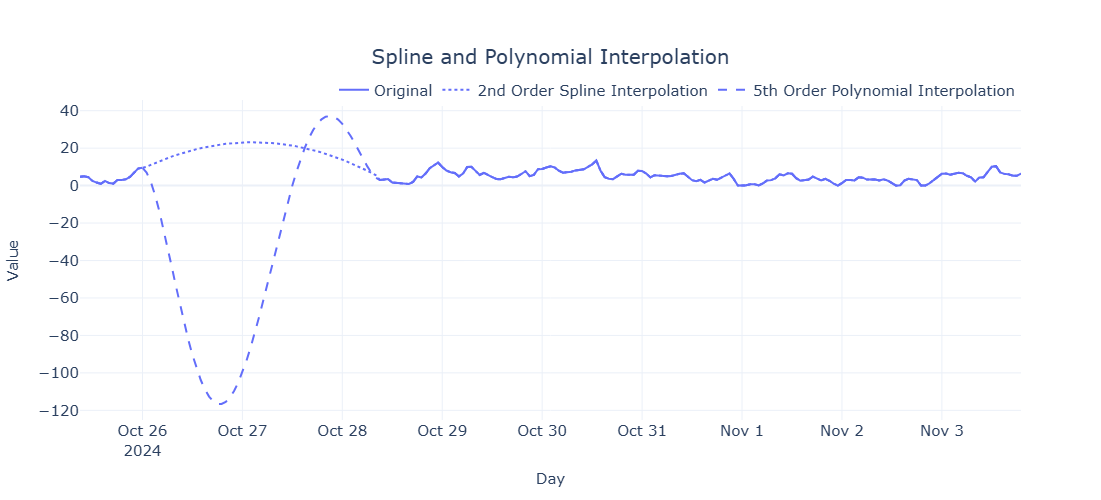

In [133]:
#Plotting
plot_df = pd.melt(_df.reset_index(), id_vars="datetime", var_name="series")
fig = px.line(plot_df, x="datetime", y=["value"], line_dash="series", title="Spline and Polynomial Interpolation")
fig = format_plot(fig, ['Original', "2nd Order Spline Interpolation", "5th Order Polynomial Interpolation"])
fig.write_image("imgs/chapter_2/spline_polynomial_missing_values.png")
fig.show()